Pkg.status()
  [336ed68f] CSV v0.10.14
  [a93c6f00] DataFrames v1.6.1
  [38e38edf] GLM v1.9.0
  [7073ff75] IJulia v1.25.0
  [98e50ef6] JuliaFormatter v1.0.56
⌃ [91a5bcdd] Plots v1.40.4
Info Packages marked with ⌃ have new versions available and may be upgradable.

In [1]:
using Pkg # 패키지를 인스톨하고 관리하는데 사용
using CSV # CSV파일을 읽기 위해 사용
using DataFrames # 데이터를 가공하기 위해 사용
using Plots # 그림을 그리기 위해 사용
using QuantileRegressions # 최소절대편차법을 사용하기 위해 사용
using GLM # 최소제곱법을 사용하기 위해 사용
using StatsModels

In [17]:
# pwd를 통해 현재 경로를 확인한 후, 본인의 프로젝트 폴더를 기본경로로 만들어주면 편하다.
pwd() 
cd("/Users/kiwoongkim/Library/CloudStorage/OneDrive-공유라이브러리-Onedrive/projects/econometrics")
readdir("data/chirok_han")

11-element Vector{String}:
 "avgsal12.csv"
 "co2gdp2005.csv"
 "deathrate.csv"
 "galtonpar.csv"
 "hhsvy14.csv"
 "ivdata.csv"
 "klips11subset.csv"
 "regdatako3.csv"
 "serv.csv"
 "smoke.csv"
 "twoyear.csv"

In [18]:
serv = CSV.read("data/chirok_han/serv.csv", DataFrame)
serv1 = filter(row -> row.servpc < 28, serv)
print(first(serv1, 5))

5×3 DataFrame
 Row │ gun                 servpc   finind  
     │ String31            Float64  Float64 
─────┼──────────────────────────────────────
   1 │ BuSan GiJangGun        4.87     40.4
   2 │ DaeGu DalSeongGun      3.78     38.5
   3 │ InCheon GangHwaGun     9.69     17.2
   4 │ UlSan UlJuGun          3.75     48.6
   5 │ GyeongGi YeoJuGun      6.3      35.8

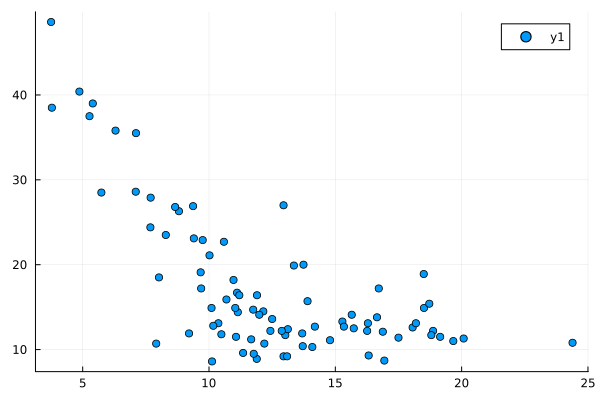

In [12]:
scatter(serv1.servpc, serv1.finind)

In [13]:
ols = lm(@formula(finind ~ servpc), serv1)
serv1.yfit_ols = predict(ols)
print(first(serv1, 5))

5×4 DataFrame
 Row │ gun                 servpc   finind   yfit_ols 
     │ String31            Float64  Float64  Float64  
─────┼────────────────────────────────────────────────
   1 │ BuSan GiJangGun        4.87     40.4   27.7865
   2 │ DaeGu DalSeongGun      3.78     38.5   29.313
   3 │ InCheon GangHwaGun     9.69     17.2   21.0361
   4 │ UlSan UlJuGun          3.75     48.6   29.355
   5 │ GyeongGi YeoJuGun      6.3      35.8   25.7838

In [15]:
lad = qreg(@formula(finind ~ servpc), serv1, .5)

# 회귀 계수 추출
intercept = coef(lad)[1]
slope = coef(lad)[2]

# 회귀선을 그리기 위한 y 값 계산
serv1.yfit_lad = intercept .+ slope .* serv1.servpc
print(first(serv1, 5))

5×5 DataFrame
 Row │ gun                 servpc   finind   yfit_ols  yfit_lad 
     │ String31            Float64  Float64  Float64   Float64  
─────┼──────────────────────────────────────────────────────────
   1 │ BuSan GiJangGun        4.87     40.4   27.7865   21.6747
   2 │ DaeGu DalSeongGun      3.78     38.5   29.313    22.5437
   3 │ InCheon GangHwaGun     9.69     17.2   21.0361   17.8321
   4 │ UlSan UlJuGun          3.75     48.6   29.355    22.5676
   5 │ GyeongGi YeoJuGun      6.3      35.8   25.7838   20.5347

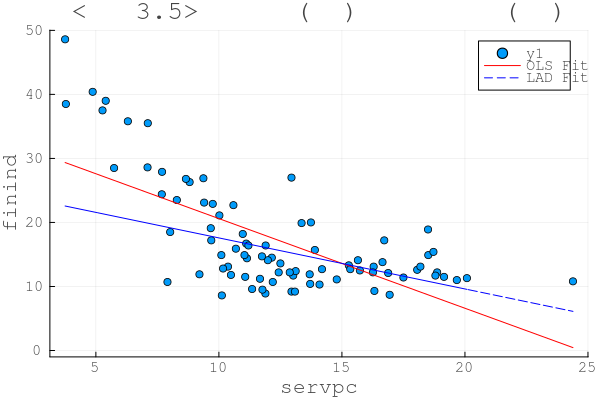

GKS: could not find font D2Coding.ttf
GKS: glyph missing from current font: 44536
GKS: glyph missing from current font: 47548
GKS: glyph missing from current font: 52572
GKS: glyph missing from current font: 49548
GKS: glyph missing from current font: 51228
GKS: glyph missing from current font: 44273
GKS: glyph missing from current font: 48277
GKS: glyph missing from current font: 49892
GKS: glyph missing from current font: 49440
GKS: glyph missing from current font: 44284
GKS: glyph missing from current font: 52572
GKS: glyph missing from current font: 49548
GKS: glyph missing from current font: 51208
GKS: glyph missing from current font: 45824
GKS: glyph missing from current font: 54200
GKS: glyph missing from current font: 52264
GKS: glyph missing from current font: 48277
GKS: glyph missing from current font: 51216
GKS: glyph missing from current font: 49440
GKS: glyph missing from current font: 44536
GKS: glyph missing from current font: 47548
GKS: glyph missing from current font: 

In [16]:
scatter(serv1.servpc, serv1.finind)
plot!(serv1.servpc, serv1.yfit_ols, label="OLS Fit", color=:red, line=:solid)
plot!(serv1.servpc, serv1.yfit_lad, label="LAD Fit", color=:blue, line=:dash)
plot!(title="<그림 3.5> 최소제곱법(실선)과 최소절대편차법(점선)", fontfamily = "D2Coding")
plot!(xlabel="servpc", ylabel="finind", fontfamily = "D2Coding")

## 자크-베라 검정[Jarque-Bra(JB) Test]

In [36]:
using Pkg
using Plots
using HypothesisTests
using Distributions
default(fontfamily="sans-serif")

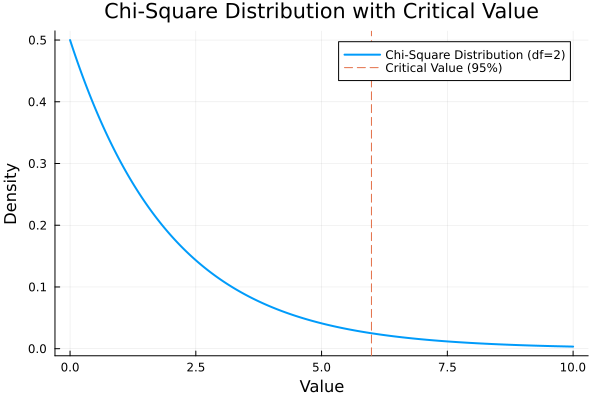

In [44]:

# 카이제곱 분포 생성
χ²_dist = Chisq(2)

# x값 범위 설정
x = 0:0.01:10

# 카이제곱 분포의 확률 밀도 함수 (PDF) 계산
y = pdf(χ²_dist, x)

# 임계값 계산 (95% 신뢰수준)
critical_value = quantile(χ²_dist, 0.95)

# 카이제곱 분포 그리기
plot(x, y, label="Chi-Square Distribution (df=2)", linewidth=2, legend=:topright)

# 임계값을 점선으로 표시
vline!([critical_value], linestyle=:dash, label="Critical Value (95%)")

# 그래프 제목과 축 라벨 설정
title!("Chi-Square Distribution with Critical Value")
xlabel!("Value")
ylabel!("Density")

# 그래프 표시
plot!()

In [29]:
ols = lm(@formula(finind ~ servpc), serv1)
serv1.yfit_ols = predict(ols)
serv1.resid = serv1.finind - serv1.yfit_ols
print(first(serv1, 5))

5×5 DataFrame
 Row │ gun                 servpc   finind   yfit_ols  resid    
     │ String31            Float64  Float64  Float64   Float64  
─────┼──────────────────────────────────────────────────────────
   1 │ BuSan GiJangGun        4.87     40.4   27.7865  12.6135
   2 │ DaeGu DalSeongGun      3.78     38.5   29.313    9.18697
   3 │ InCheon GangHwaGun     9.69     17.2   21.0361  -3.83614
   4 │ UlSan UlJuGun          3.75     48.6   29.355   19.245
   5 │ GyeongGi YeoJuGun      6.3      35.8   25.7838  10.0162

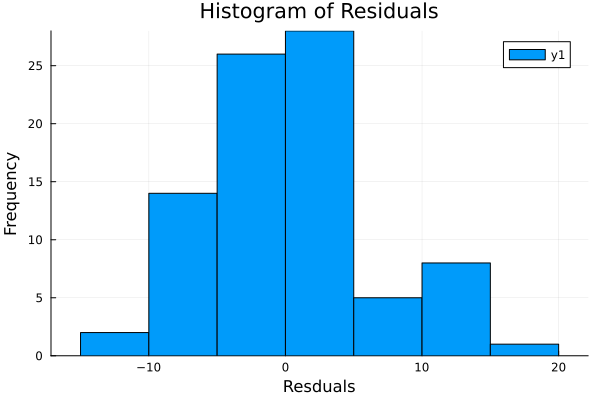

In [31]:
histogram(serv1.resid, title="Histogram of Residuals", xlabel="Resduals", ylabel="Frequency")

#### 왜도 (Skewness)
왜도는 데이터 분포의 비대칭성을 나타냅니다. 왜도의 값은 데이터가 평균을 중심으로 어떻게 분포되어 있는지를 설명합니다.

#### 첨도 (Kurtosis)
첨도는 데이터 분포의 꼬리 부분이 얼마나 두꺼운지 또는 얇은지를 나타냅니다. 첨도는 데이터 분포의 꼬리와 중심 피크의 높이를 설명합니다.

% Jarque-Bera Test Formula
\begin{equation}
JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
\end{equation}

% Skewness Formula
\begin{equation}
S = \frac{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3 }{ \left( \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 \right)^{3/2} }
\end{equation}

% Kurtosis Formula
\begin{equation}
K = \frac{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^4 }{ \left( \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 \right)^2 }
\end{equation}

In [33]:
# Jarque-Bera 검정 수행
jb_test = JarqueBeraTest(serv1.resid)

# 결과 확인
println(jb_test)

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.4384700069283027 and 3.031096575747271"

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.2599

Details:
    number of observations:         84
    JB statistic:                   2.69497

